In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_palette('Spectral')
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('marketing_data.csv')
display(df.head())

print(df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


(2240, 28)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# Data Quality

In [ ]:
for dtype, col in list(zip(df.dtypes, df.columns)):
  if dtype == 'int64' or dtype == 'float64':
    print(f'Numeric Columns\n{col}: {dtype}')
    print(f'Min Value: {df[col].min()} | Max Value: {df[col].max()}')
  else:
    print(f'Categorical Columns\n{col}: {dtype}')
    print(f'{df[col].unique()}')  

  print()

Numeric Columns
ID: int64
Min Value: 0 | Max Value: 11191

Numeric Columns
Year_Birth: int64
Min Value: 1893 | Max Value: 1996

Categorical Columns
Education: object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Categorical Columns
Marital_Status: object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

Categorical Columns
 Income : object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Numeric Columns
Kidhome: int64
Min Value: 0 | Max Value: 2

Numeric Columns
Teenhome: int64
Min Value: 0 | Max Value: 2

Categorical Columns
Dt_Customer: object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13

## Kolom yang concern perlu dihandle
1. Income (object) -> float64
2. Nama kolom Income perlu dihapus whitespacenya
3. Dt_Customer (object) -> date_time
4. Ada missing values pada kolom Income
5. Nilai Year Birth ada yang sampai tahun 1893

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

<ipython-input-8-f2211e1df985>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [ ]:
df['Income'] = df['Income'].astype('float64')

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

## Duplicate Data

In [ ]:
df.duplicated().sum()

0

Tidak ada nilai duplikat

## Missing Values

In [ ]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Untuk menghandle missing values, perlu dilihat dulu distribusi datanya dan outliersnya

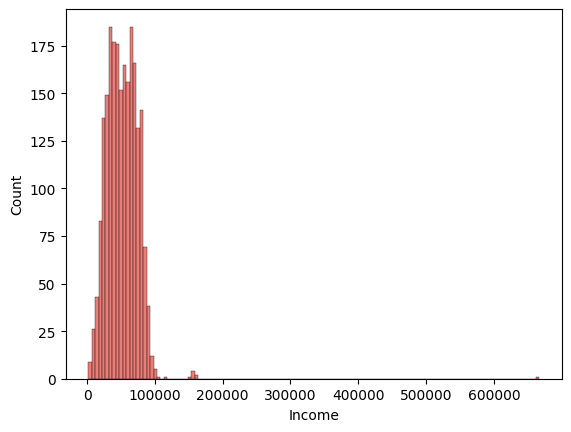

In [ ]:
sns.histplot(data=df, x='Income')

plt.show()

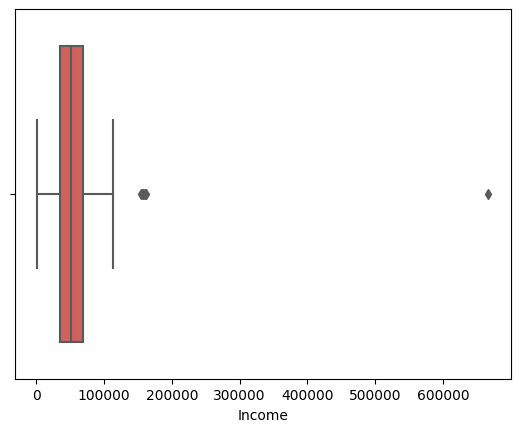

In [ ]:
sns.boxplot(data=df, x='Income')

plt.show()

1. Data income terlihat bahwa banyak customer yang incomenya tidak terlalu besar, < $120000
2. Terdapat outliers pada nilai income, sehingga missing values akan diisi dengan nilai median

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

## Outliers

In [ ]:
df_num = df.select_dtypes(include=['int', 'float'])
df_num.drop(columns=['ID'], inplace=True)

In [ ]:
df_num.shape

(2240, 23)

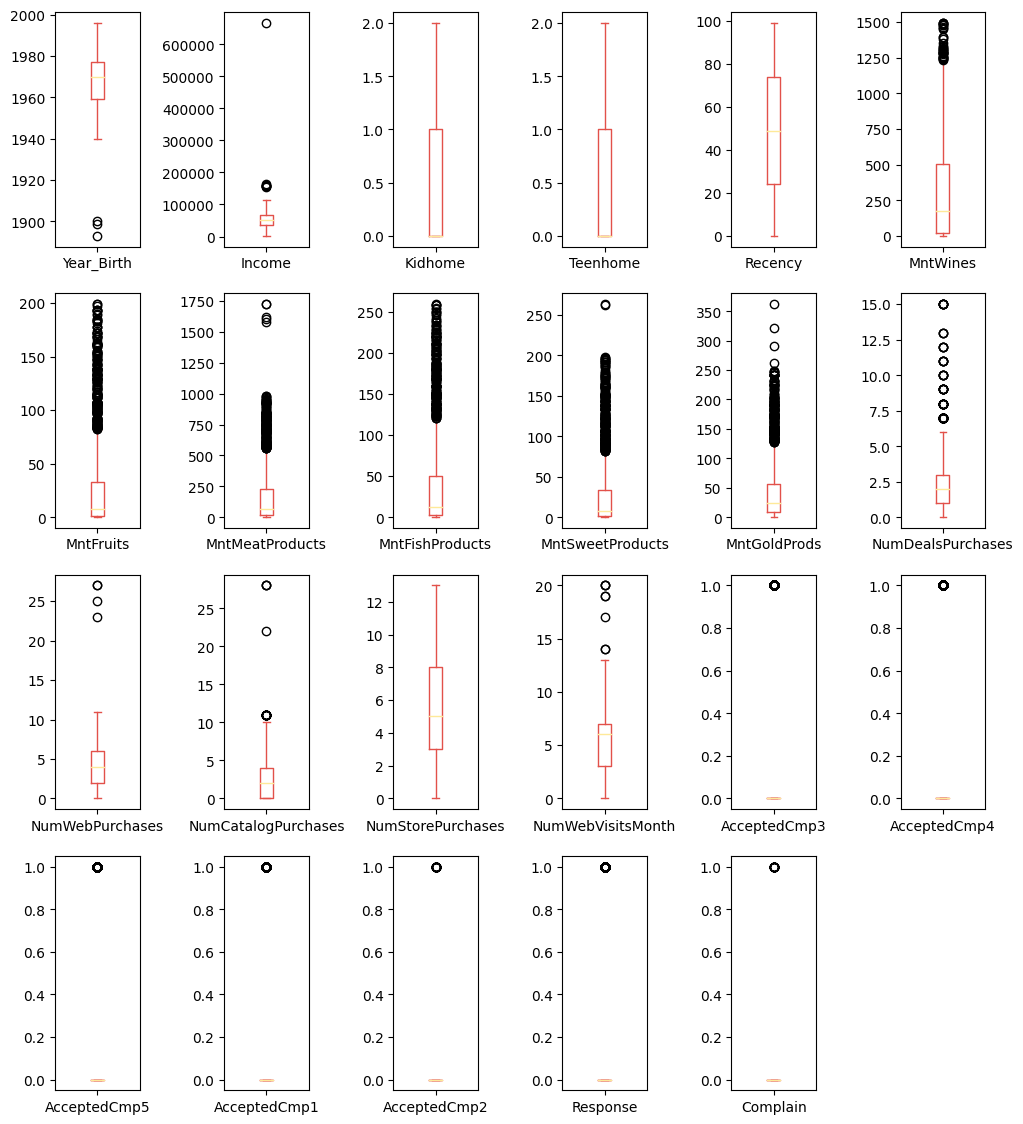

In [ ]:
df_num.plot(subplots=True, layout=(4,6), figsize=(12,14), kind='box')

plt.subplots_adjust(wspace=1)
plt.show()

In [ ]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

### cek lagi

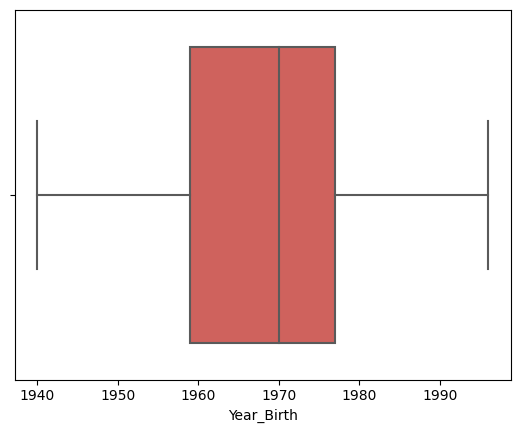

In [ ]:
sns.boxplot(data=df, x='Year_Birth')

plt.show()

## Cek distribusi data

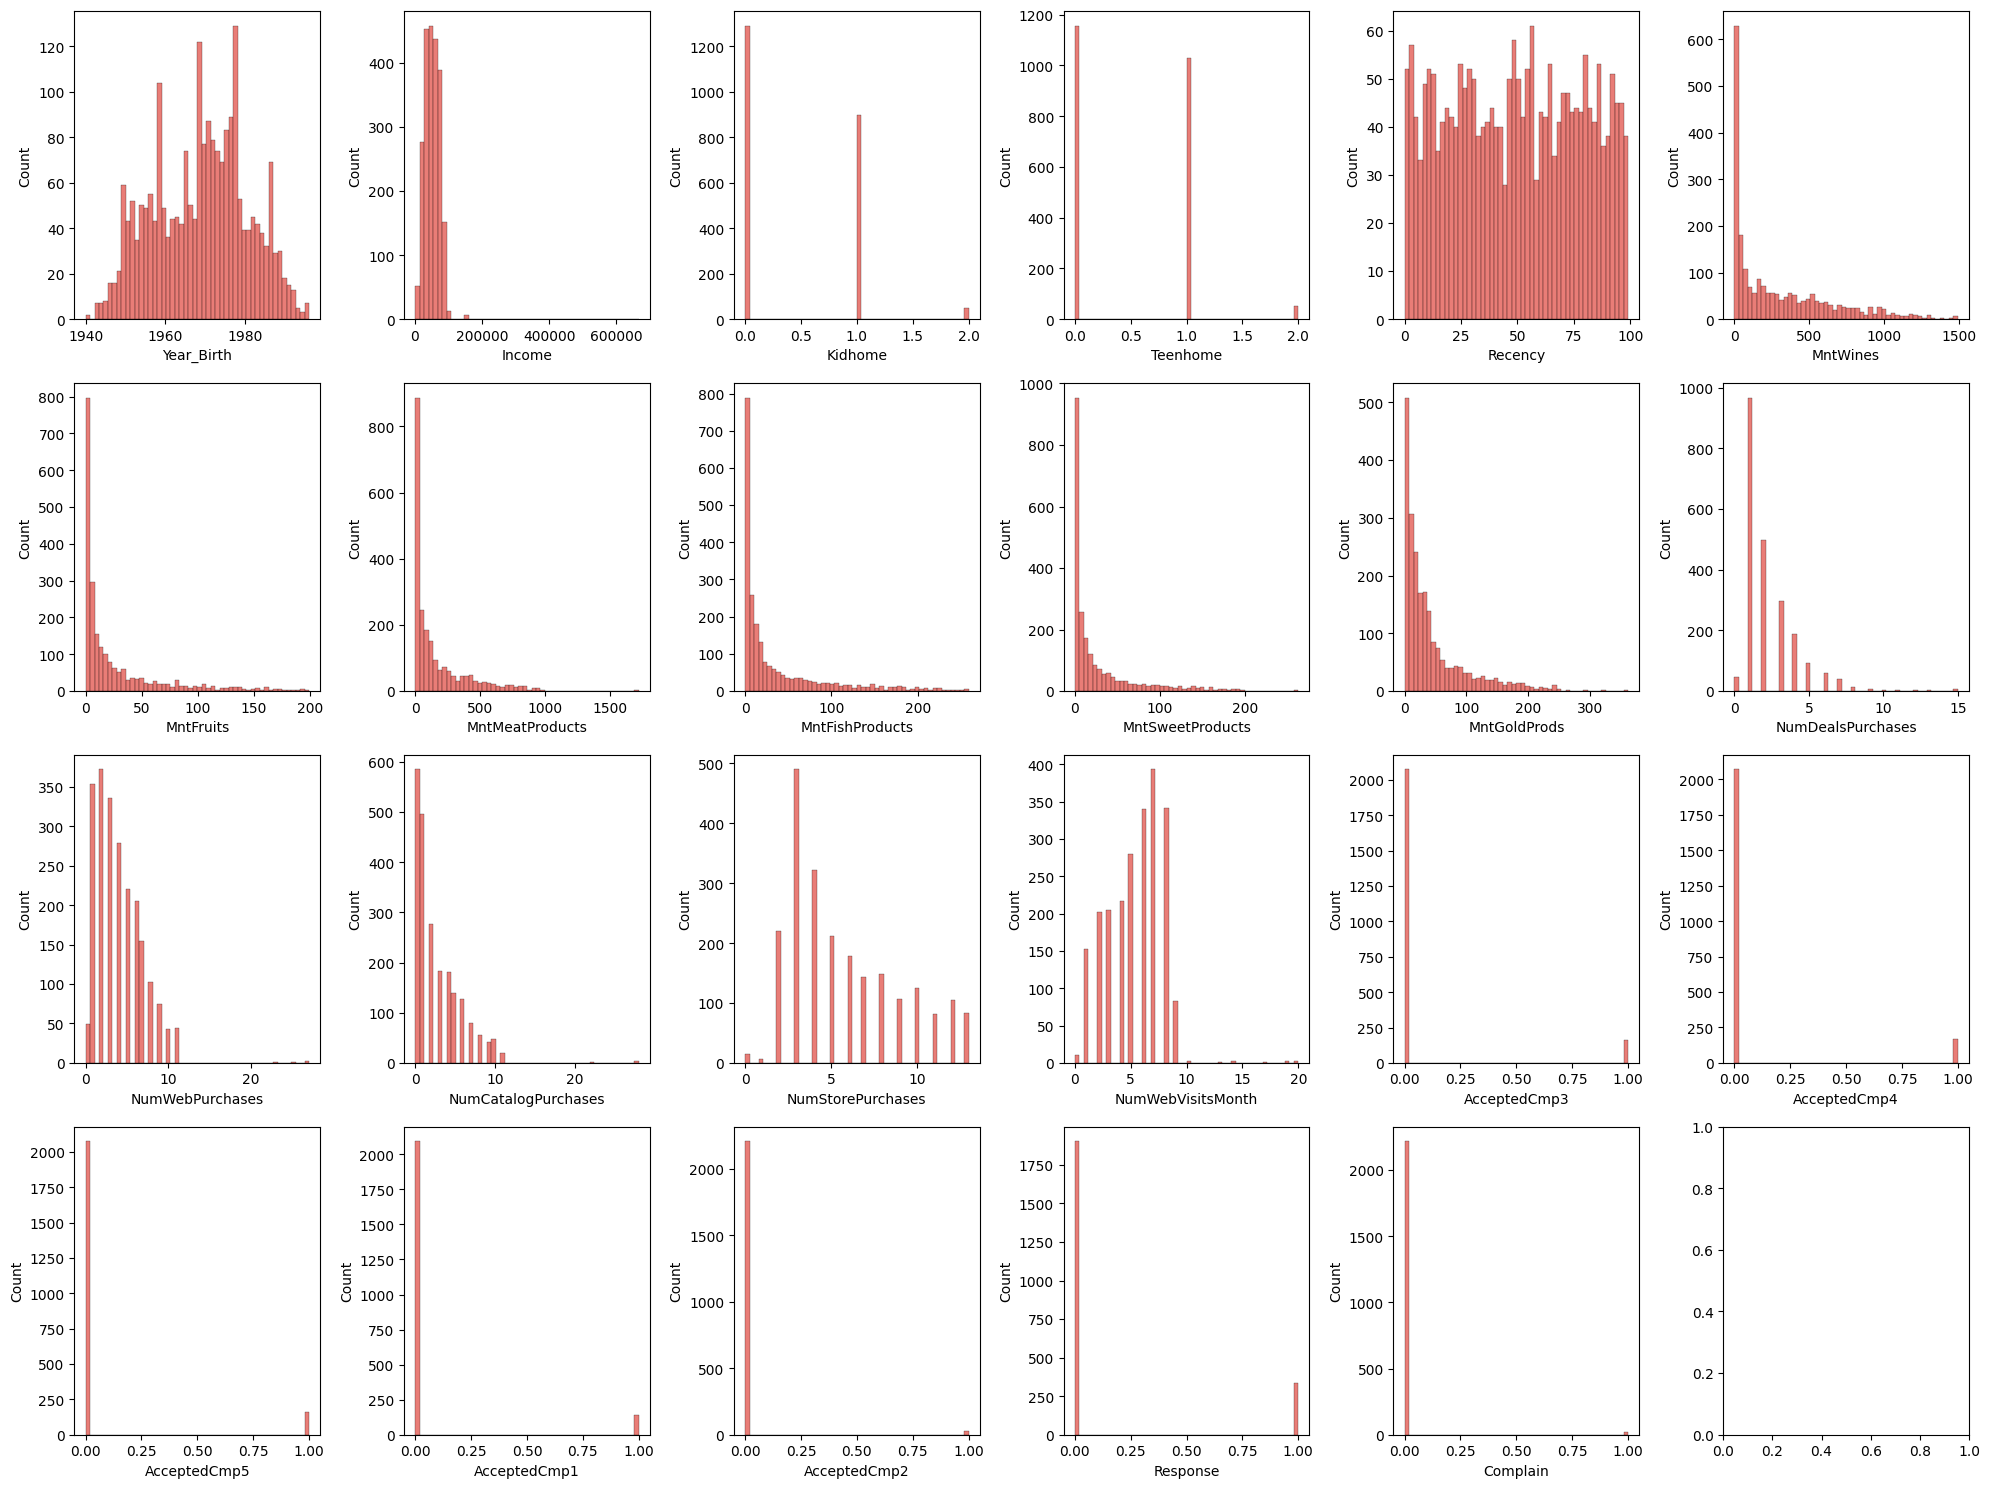

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(20,15))
plt.subplots_adjust(hspace=0.5, wspace=1)

for col, ax in zip(df_num.columns, ax.ravel()):
  sns.histplot(data=df, x=col, bins=50, ax=ax)

plt.tight_layout()

Distribusi normal semua, tidak ada distribusi yang tidak normal

# Insight

In [ ]:
df['customer_age_when_join'] = df['Dt_Customer'].dt.year - df['Year_Birth']

## Umur customer ketika join

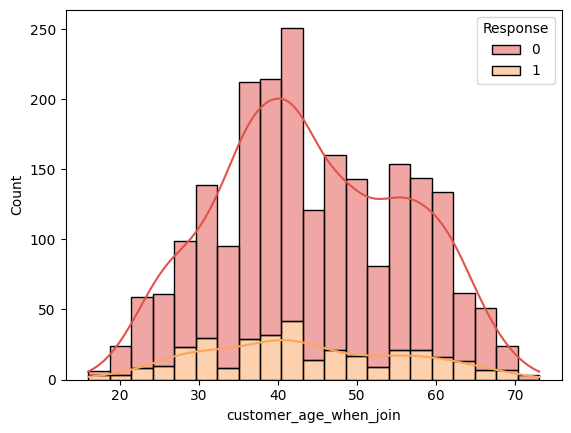

In [ ]:
sns.histplot(data=df, x='customer_age_when_join', hue='Response', kde=True, multiple='stack')

plt.show()

Rata-rata customer join saat berumur 40 tahun

## Pendidikan customer

In [ ]:
group_ed_res = df.groupby(['Education', 'Response']).agg({
    'ID': 'count'
})
total_education = df.groupby(['Education']).agg({
    'ID': 'count'
})
# total_education
percent_of_total_ed_res = group_ed_res.div(total_education, level='Education') * 100
percent_of_total_ed_res.reset_index(inplace=True)
# percent_of_total_ed_res.rename(columns)

<AxesSubplot:>

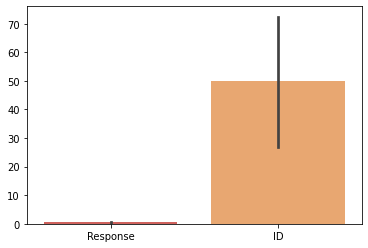

In [ ]:
sns.barplot(data=percent_of_total_ed_res)

Ada 

In [ ]:
percent_of_total_ed_res

,Education,Response,ID
0,2n Cycle,0,89.054726
1,2n Cycle,1,10.945274
2,Basic,0,96.296296
3,Basic,1,3.703704
4,Graduation,0,86.512866
5,Graduation,1,13.487134
6,Master,0,84.594595
7,Master,1,15.405405
8,PhD,0,79.175258
9,PhD,1,20.824742


## Hubungan income dengan pendidikan customer

(0.0, 200000.0)

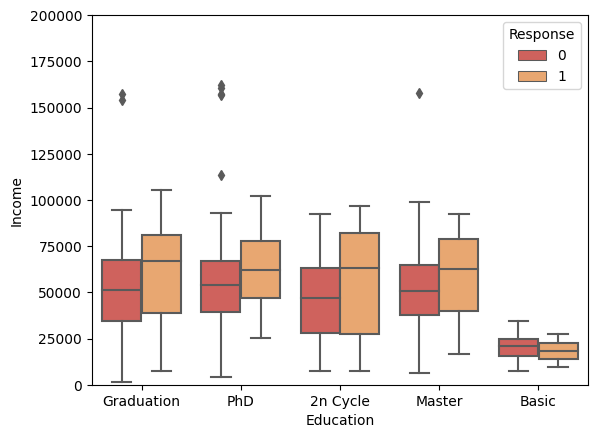

In [ ]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 200000)

Customer yang mempunyai rata-rata income tinggi cenderung mengambil promo campaign 

## Marital Status

In [ ]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

Nilai YOLO, Alone, dan Absurd mempunyai makna yang sama dengan Single, sehingga akan disatukan nilainya menjadi single

In [ ]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

In [ ]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

<Axes: xlabel='Marital_Status', ylabel='count'>

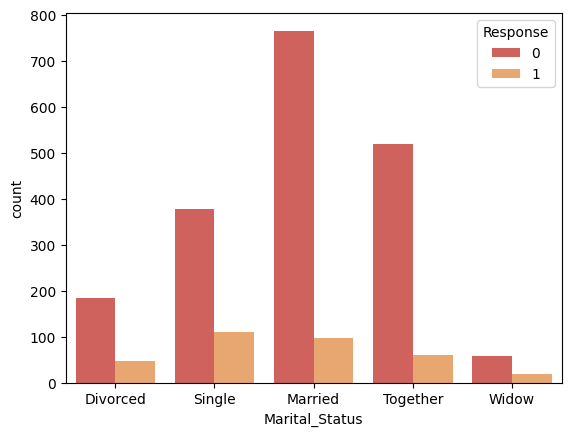

In [ ]:
sns.countplot(data=df, x='Marital_Status', hue='Response')

Orang dengan status single (hanya membiayai diri sendiri) ada kecenderungan akan mengambil promo campaign

## Hubungan Jumlah Tanggungan dengan response

In [ ]:
df['Num_dependants'] = df['Kidhome'] + df['Teenhome']

<Axes: xlabel='Num_dependants', ylabel='count'>

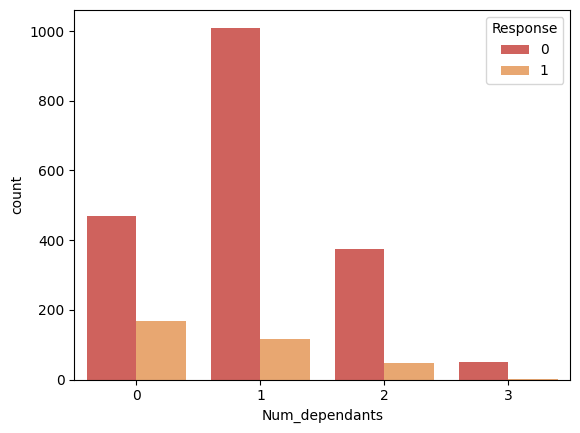

In [ ]:
sns.countplot(data=df, x='Num_dependants', hue='Response')

Terlihat bahwa customer yang tidak mempunyai tanggungan lebih banyak mengambil promo campaign

## Hubungan lama customer bergabung dengan response

In [ ]:
df['Customer_Join_Month'] = df['Dt_Customer'].dt.month
df['Customer_Join_Year'] = df['Dt_Customer'].dt.year

### Month

<Axes: xlabel='Customer_Join_Month', ylabel='count'>

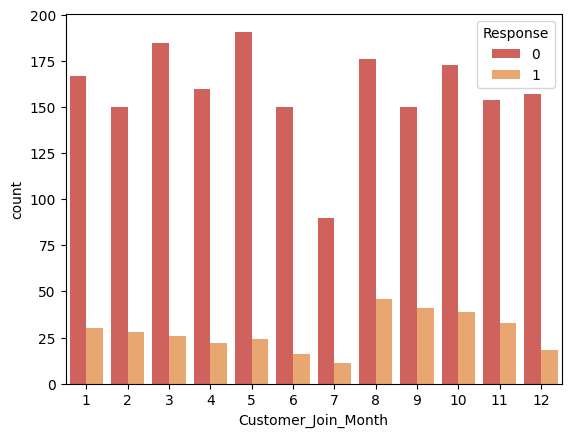

In [ ]:
sns.countplot(data=df, x='Customer_Join_Month', hue='Response')

Customer yang bergabung pada bulan Agustus, September, Oktober, dan November lebih banyak yang mengambil promo campaign

### Year

<Axes: xlabel='Customer_Join_Year', ylabel='count'>

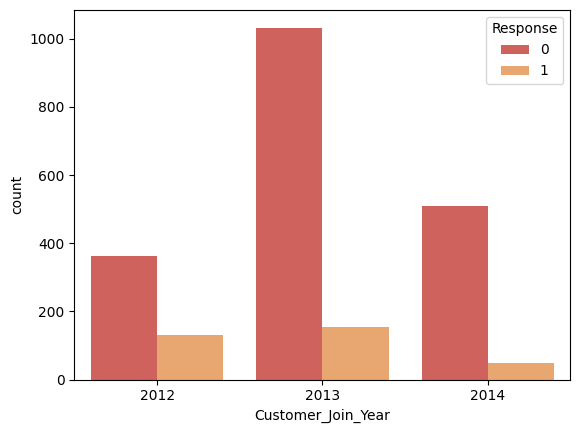

In [ ]:
sns.countplot(data=df, x='Customer_Join_Year', hue='Response')

Customer yang sudah lama bergabung lebih banyak yang mengambil promo campaign